<h1>Regressione Logistica<h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

path = "U4_04_train.csv"
df = pd.read_csv(path)

df.head()

c:\Users\rigel\OneDrive\Desktop\python domestika\dataIA\Titanic Survival Prediction – Logistic Regression ML Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

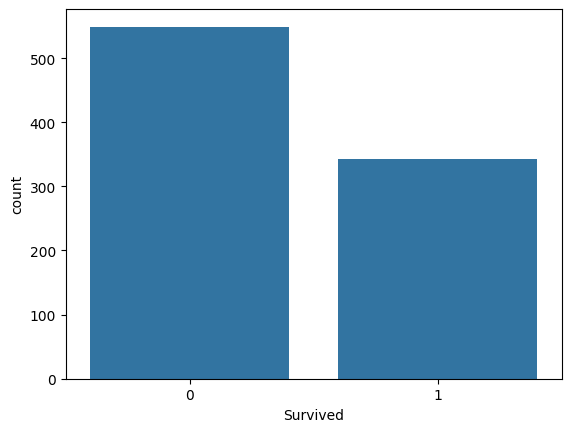

In [3]:
import seaborn as sb

sb.countplot(x="Survived" ,data=df)

<Axes: xlabel='Survived', ylabel='count'>

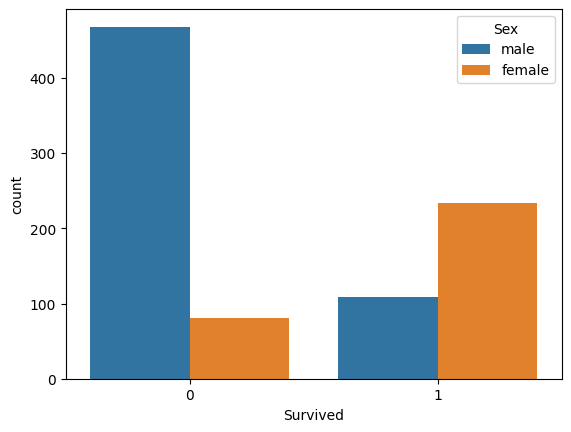

In [4]:
sb.countplot(x="Survived" ,data=df ,hue="Sex")

In [5]:
df.isna().sum()
# dati mancanti  age e cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

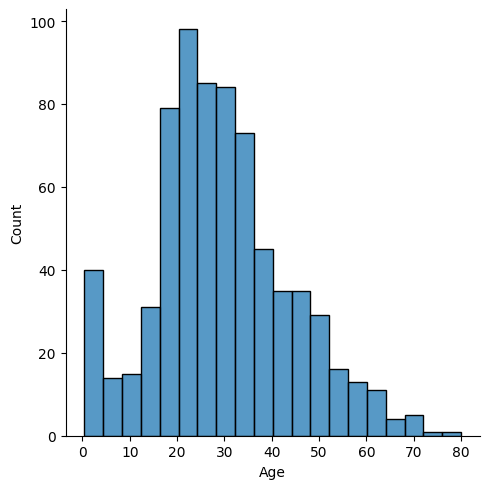

In [6]:
sb.displot(x="Age",data=df)

In [7]:
df["Age"].mean()


np.float64(29.69911764705882)

In [8]:
# df["Age"] = df["Age"].fillna(df["Age"].mean())
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Age']] = imputer.fit_transform(df[['Age']])


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df = df.drop(["Cabin"],axis=1)


In [11]:
df = df.dropna()

In [12]:
df = df.drop(["PassengerId","Ticket"],axis=1)

In [13]:
df = df.drop(["Name"],axis=1)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
dummies_sex = pd.get_dummies(df["Sex"], drop_first=True,dtype=int)

In [16]:
df = df.join(dummies_sex)
df  = df.drop(["Sex"],axis=1)

In [17]:
dummies_embarked = pd.get_dummies(df["Embarked"], drop_first=True ,dtype=int)

In [18]:
df = df.join(dummies_embarked)
df  = df.drop(["Embarked"],axis=1)

# FEATURE ENGENERING

In [19]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1


In [20]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,FamilySize
0,0,3,22.0,1,0,7.2500,1,0,1,2
1,1,1,38.0,1,0,71.2833,0,0,0,2
2,1,3,26.0,0,0,7.9250,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,2
4,0,3,35.0,0,0,8.0500,1,0,1,1


<Axes: xlabel='Survived', ylabel='count'>

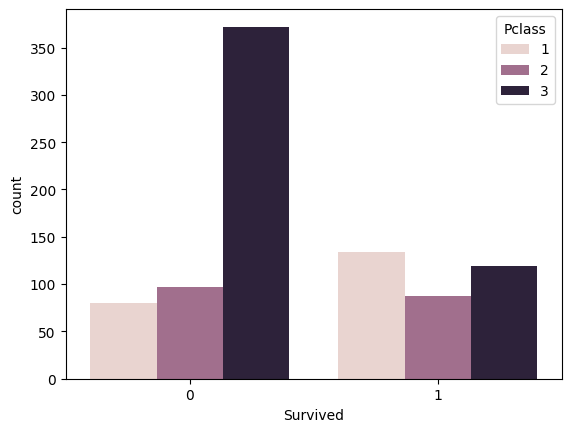

In [21]:
sb.countplot(x="Survived", data=df ,hue="Pclass")

In [22]:
X = df.drop(["Survived"],axis=1)
y = df["Survived"]


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train , y_test = train_test_split(X,y,test_size=.2)

In [24]:
df.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
male          0
Q             0
S             0
FamilySize    0
dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced", max_iter=1000 ,random_state=42)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
prediction = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8314606741573034

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test , prediction))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        97
           1       0.85      0.77      0.81        81

    accuracy                           0.83       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.83      0.83      0.83       178



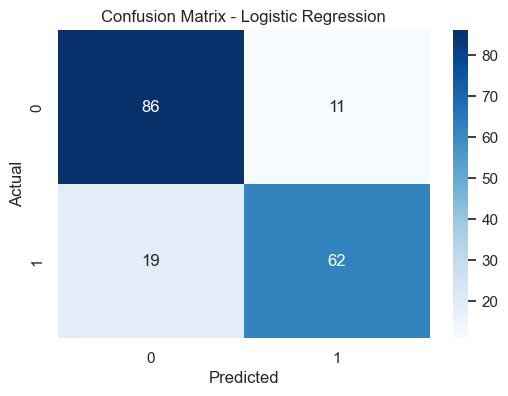

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,prediction)



cm = confusion_matrix(y_test, prediction, labels=model.classes_)
sb.set_theme(rc={'figure.figsize':(6,4)})
sb.heatmap(pd.DataFrame(cm, index=model.classes_, columns=model.classes_), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [30]:
pd.DataFrame(confusion_matrix(y_test,prediction),columns=["Pred: No","Pred: Si"],index=["Real: No","Real: Si"])

,Pred: No,Pred: Si
Real: No,86,11
Real: Si,19,62


In [31]:
X.head(10)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,FamilySize
0,3,22.000000,1,0,7.2500,1,0,1,2
1,1,38.000000,1,0,71.2833,0,0,0,2
2,3,26.000000,0,0,7.9250,0,0,1,1
3,1,35.000000,1,0,53.1000,0,0,1,2
4,3,35.000000,0,0,8.0500,1,0,1,1
5,3,29.699118,0,0,8.4583,1,1,0,1
6,1,54.000000,0,0,51.8625,1,0,1,1
7,3,2.000000,3,1,21.0750,1,0,1,5
8,3,27.000000,0,2,11.1333,0,0,1,3
9,2,14.000000,1,0,30.0708,0,0,0,2


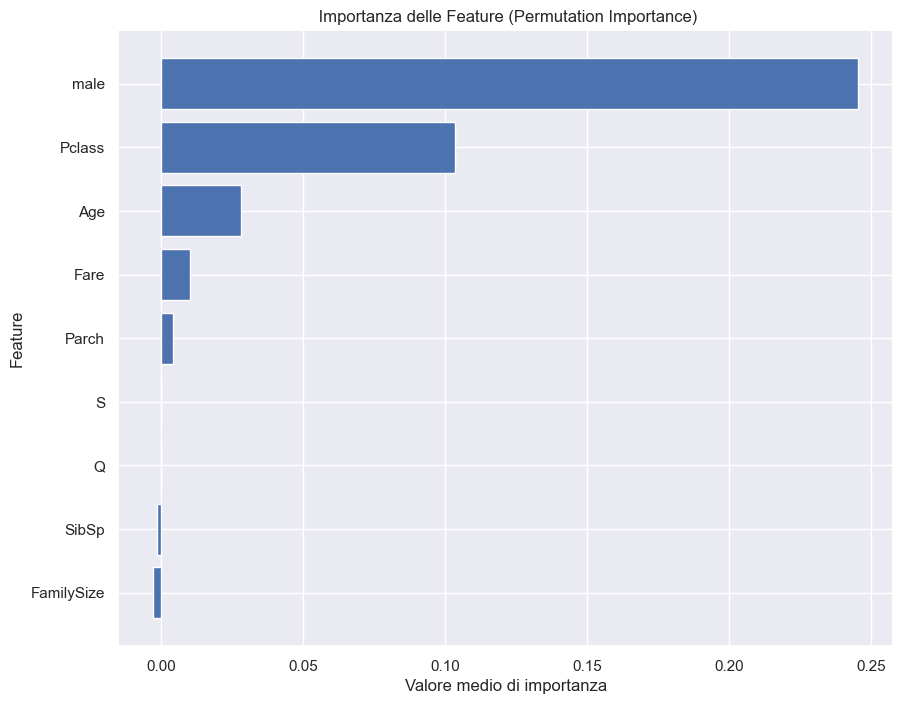

,Feature,Importance
8,FamilySize,-2.808989e-03
2,SibSp,-1.685393e-03
6,Q,0.000000e+00
7,S,2.220446e-17
3,Parch,3.932584e-03
4,Fare,1.011236e-02
1,Age,2.808989e-02
0,Pclass,1.033708e-01
5,male,2.455056e-01


In [32]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)


plt.figure(figsize=(10, 8))
plt.barh(importances['Feature'], importances['Importance'])
plt.title(' Importanza delle Feature (Permutation Importance)')
plt.xlabel('Valore medio di importanza')
plt.ylabel('Feature')
plt.show()

importances.head(23)


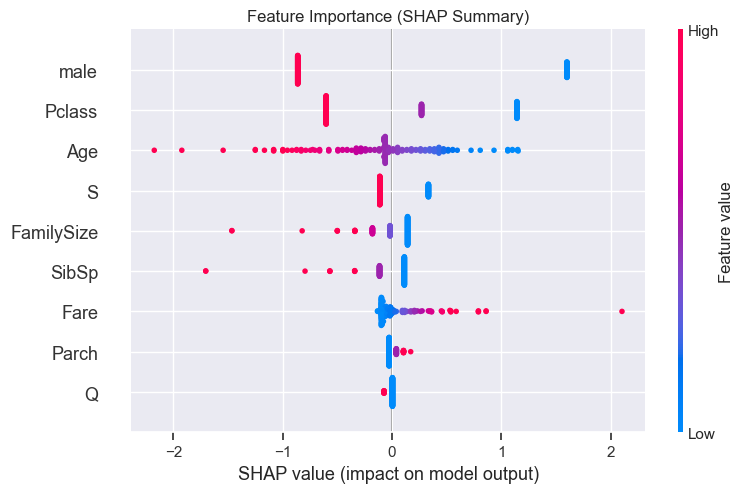

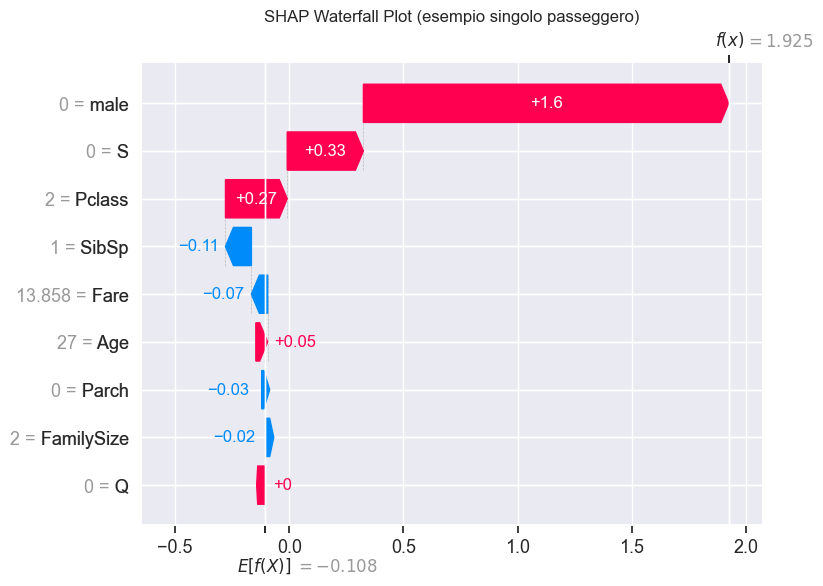

In [33]:
# Crea un explainer basato sul modello addestrato
explainer = shap.Explainer(model, X_train)

# Calcola i valori SHAP per il test set
shap_values = explainer(X_test)

# --- Plot 1: importanza media delle feature ---
plt.title("Feature Importance (SHAP Summary)")
shap.summary_plot(shap_values, X_test, show=False)
plt.show()

# --- Plot 2: spiegazione di una singola predizione ---
# Esempio: primo passeggero del test set
plt.title("SHAP Waterfall Plot (esempio singolo passeggero)")
shap.plots.waterfall(shap_values[0])

In [34]:
from sklearn.feature_selection import RFE

# Esegui la selezione automatica
rfe = RFE(model, n_features_to_select=8)  # scegli quante mantenerne (es. 8)
rfe.fit(X_train, y_train)

# Mostra le feature selezionate
selected_features = X.columns[rfe.support_]
print("📊 Feature selezionate automaticamente:")
print(selected_features)

# Crea un nuovo dataset ridotto
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]


📊 Feature selezionate automaticamente:
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S', 'FamilySize'], dtype='object')


In [35]:
log_model_reduced = LogisticRegression(max_iter=1000, random_state=42)
log_model_reduced.fit(X_train_reduced, y_train)

print("✅ Modello ricalcolato con feature selezionate.")
print("Accuracy:", log_model_reduced.score(X_test_reduced, y_test))


✅ Modello ricalcolato con feature selezionate.
Accuracy: 0.8089887640449438


In [36]:
selected_features

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S', 'FamilySize'], dtype='object')

In [37]:
def test_player(model, X_columns, **kwargs):
    """
    Funzione per testare automaticamente un nuovo giocatore.
    
    Parametri:
        model      -> modello addestrato (es. log_model)
        X_columns  -> colonne originali del training (X.columns)
        kwargs     -> valori noti del nuovo giocatore (es. Age=25, PlayTimeHours=10, ecc.)
    
    Output:
        - Predizione della classe (High / Medium / Low)
        - Probabilità per ciascuna classe
    """
    
    # dizionario con tutte le colonne, impostando a 0 quelle mancanti
    nuovo_record = {col: kwargs.get(col, 0) for col in X_columns}
    
    # Trasforma in DataFrame
    df_4_pred = pd.DataFrame([nuovo_record])
        
    # Predizione
    pred = model.predict(df_4_pred)[0]
    prob = model.predict_proba(df_4_pred)[0]
    
    # Output 
    result = pd.DataFrame({
        'Classe': model.classes_,
        'Probabilità': np.round(prob, 3)
    })
    
    print(f"🎯 Predizione: {'Sopravissuto'if pred == 1 else 'non sopravvissuto'}")
    print("\n📊 Dettaglio probabilità:\n")
    display(result.sort_values(by='Probabilità', ascending=False ,))
    
    return pred, result

In [38]:
test_player(
    log_model_reduced,  
    selected_features,
    Pclass=3,
    Age= 30,
    SibSp= 3,
    Parch= 0,
    # Fare= 80,
    male=0,
    Q=0,
    S= 1,
    FamilySize= 0,
) 

🎯 Predizione: non sopravvissuto

📊 Dettaglio probabilità:



,Classe,Probabilità
0,0,0.56
1,1,0.44


(np.int64(0),
    Classe  Probabilità
 0       0         0.56
 1       1         0.44)